In [1]:
from fit.datamodules.super_res import MNISTSResFourierTargetDataModule
from fit.utils import convert2FC, fft_interpolate, psfft, convert_to_dft, PSNR
from fit.utils.tomo_utils import get_proj_coords, get_img_coords

from matplotlib import pyplot as plt

import torch

import numpy as np

from skimage.transform import iradon

from fit.utils.utils import denormalize

In [2]:
batch_size = 4
img_shape = 27
inner_circle = True

In [3]:
dm = MNISTSResFourierTargetDataModule(root_dir='/home/tibuch/Data/mnist/', batch_size=batch_size, 
                                      inner_circle=inner_circle)
dm.setup()

In [4]:
train_dl = dm.train_dataloader()

In [5]:
for img in train_dl.dataset.ds:
    break

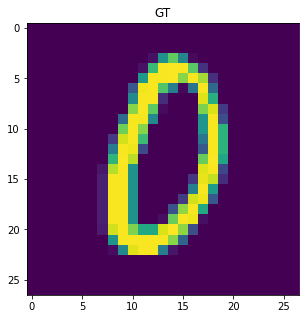

In [6]:
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.title('GT');

In [7]:
# x and y are normalized magnitude and angle of the Fourier coefficients
for x, y, (mag_min, mag_max) in train_dl:
    break

In [8]:
torch.all(x[:,1:] == y[:,:-1])

tensor(True)

In [9]:
full = torch.cat([x, y[:,-1:]], dim=1)

In [10]:
# We have to convert angle and magnitude back to Fourier coefficients
full_fc = convert2FC(full, mag_min, mag_max)

In [11]:
full_fc = full_fc.reshape(4, 27, -1)

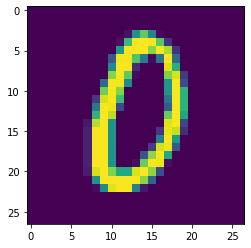

In [12]:
plt.imshow(torch.fft.irfftn(full_fc[0], s=(27,27)))